In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install yfinance
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
ativos=['ABEV3.SA', 'AAPL34.SA', 'LREN3.SA', 'WEGE3.SA']

In [ ]:
dados=yf.download(ativos, start='2015-01-01', end='2024-06-20')['Close']
dados.dropna(inplace=True, axis=1)
dados.head()

/tmp/ipython-input-4-844732140.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados=yf.download(ativos, start='2015-01-01', end='2024-06-20')['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL34.SA,ABEV3.SA,LREN3.SA,WEGE3.SA
Date,,,,
2015-01-02,3.286194,10.203087,8.884796,4.937980
2015-01-05,3.235980,10.018390,8.637799,4.971649
2015-01-06,3.905493,10.400527,8.737303,4.897901
2015-01-07,3.275035,10.547010,8.885963,4.841787
2015-01-08,3.340869,11.182539,8.896502,4.923553


<Axes: xlabel='Date'>

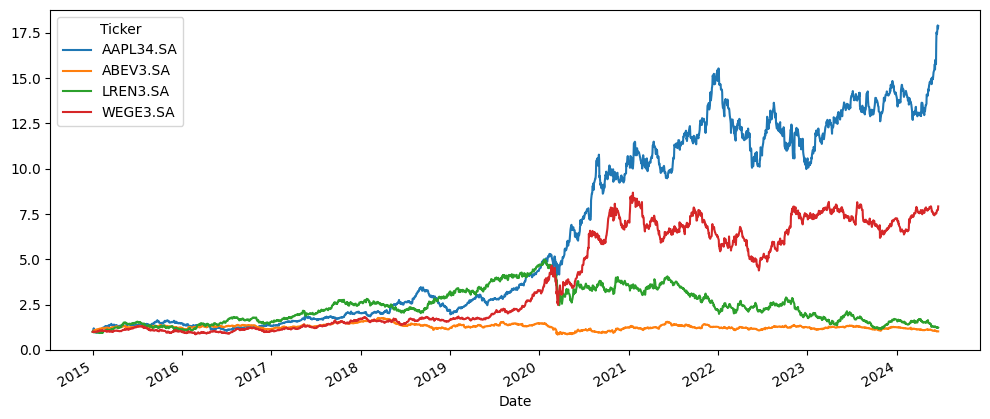

In [ ]:
(dados/dados.iloc[0]).plot(figsize=(12,5))

In [ ]:
matriz_retornos=dados.pct_change()
matriz_retornos.dropna(inplace=True)
matriz_retornos.head()

Ticker,AAPL34.SA,ABEV3.SA,LREN3.SA,WEGE3.SA
Date,,,,
2015-01-05,-0.015280,-0.018102,-0.027800,0.006818
2015-01-06,0.206897,0.038144,0.011520,-0.014834
2015-01-07,-0.161429,0.014084,0.017014,-0.011457
2015-01-08,0.020102,0.060257,0.001186,0.016888
2015-01-09,-0.008016,-0.002419,-0.035526,-0.004559


In [ ]:
matriz_cov=matriz_retornos.cov()
matriz_cov.head()

Ticker,AAPL34.SA,ABEV3.SA,LREN3.SA,WEGE3.SA
Ticker,,,,
AAPL34.SA,0.000434,0.000024,-0.000005,0.000033
ABEV3.SA,0.000024,0.000280,0.000174,0.000130
LREN3.SA,-0.000005,0.000174,0.000649,0.000193
WEGE3.SA,0.000033,0.000130,0.000193,0.000449


In [ ]:
matriz_pesos=np.random.random(len(ativos))
matriz_pesos=matriz_pesos/sum(matriz_pesos)
round(sum(matriz_pesos),2)

np.float64(1.0)

In [ ]:
retornos_anuais=((dados.iloc[-1] / dados.iloc[0])**(252/len(dados))-1)
retorno_anual=np.dot(retornos_anuais, matriz_pesos)*100
print("Retorno Anual: ", round(retorno_anual, 2), "%")

Retorno Anual:  21.31 %


In [ ]:
vol_anual = np.sqrt(np.dot(np.dot(matriz_pesos, matriz_cov), matriz_pesos.T)) * np.sqrt(252)
print("Volatilidade Anual: ", round(vol_anual * 100, 2), "%")

Volatilidade Anual:  23.55 %


In [ ]:
#Parâmetros
portfolio_returns=[]
portfolio_volatility=[]
portfolio_weights=[]
num_ativos=len(ativos)
num_portfolios=100000

In [ ]:
for portfolio in range(num_portfolios):
  weights=np.random.random(num_ativos)
  weights /= np.sum(weights)
  portfolio_weights.append(weights)
  returns=np.dot(weights, retornos_anuais)*100
  portfolio_returns.append(returns)
  volatilidade=np.sqrt(np.dot(weights.T, np.dot(matriz_cov, weights)))*np.sqrt(252)*100
  portfolio_volatility.append(volatilidade)

In [ ]:
portfolio={'Retornos Anuais (%)': portfolio_returns, 'Volatilidade Anual (%)': portfolio_volatility}

In [ ]:
for i, papel in enumerate(ativos):
  portfolio[papel + ' - Peso'] = [weights[i] for weight in portfolio_weights]
dataframe=pd.DataFrame(portfolio)

In [ ]:
dataframe.head()

,Retornos Anuais (%),Volatilidade Anual (%),ABEV3.SA - Peso,AAPL34.SA - Peso,LREN3.SA - Peso,WEGE3.SA - Peso
0,15.003543,20.492923,0.313227,0.344455,0.076381,0.265937
1,11.343996,23.361038,0.313227,0.344455,0.076381,0.265937
2,13.967820,21.520149,0.313227,0.344455,0.076381,0.265937
3,14.001649,25.310435,0.313227,0.344455,0.076381,0.265937
4,10.755831,21.549047,0.313227,0.344455,0.076381,0.265937


In [ ]:
dataframe['Retorno sobre Risco'] = dataframe['Retornos Anuais (%)'] / dataframe['Volatilidade Anual (%)']
maximo_sharpe=(dataframe.sort_values(by=['Retorno sobre Risco'], ascending=False)).iloc[0]
pesos_maximo_sharpe=list(maximo_sharpe[2:6])

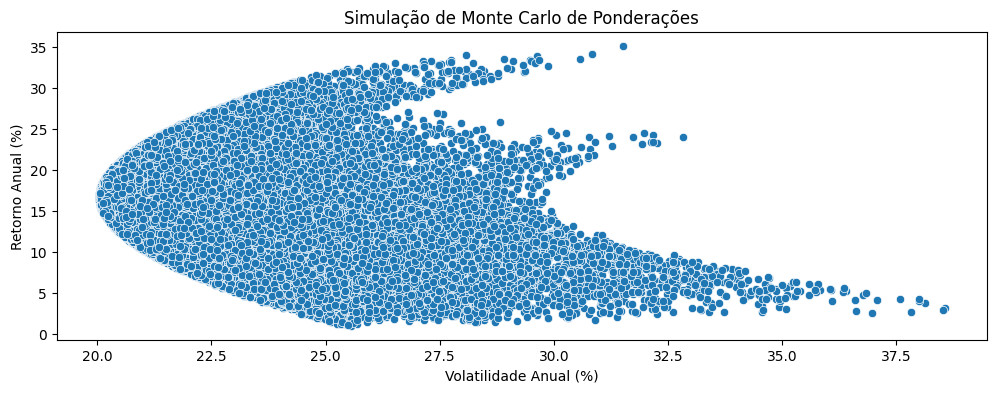

In [ ]:
fig=plt.figure(figsize=(12,4))
sb.scatterplot(data=dataframe.iloc[:,0:2], x=dataframe.columns[1], y=dataframe.columns[0])
plt.title("Simulação de Monte Carlo de Ponderações")
plt.xlabel("Volatilidade Anual (%)")
plt.ylabel("Retorno Anual (%)")
plt.show()

/tmp/ipython-input-34-2998626913.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataframe_comparativo['Ibovespa'] = yf.download('^BVSP', start='2015-01-01', end='2024-06-30')['Close'] / yf.download('^BVSP', start='2015-01-01', end='2024-06-30')['Close'].iloc[0]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-34-2998626913.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataframe_comparativo['Ibovespa'] = yf.download('^BVSP', start='2015-01-01', end='2024-06-30')['Close'] / yf.download('^BVSP', start='2015-01-01', end='2024-06-30')['Close'].iloc[0]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-34-2998626913.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataframe_comparativo_out['Portfolio Máximo Sharpe Fora da Amostra'] = (1+(yf.download(ativos, start='2024-07-01', end='2025-06-30')['Close']

<Axes: title={'center': 'Portfolio Máximo Sharpe Fora da Amostra vs Benchmark'}, xlabel='Date'>

<Figure size 1500x300 with 0 Axes>

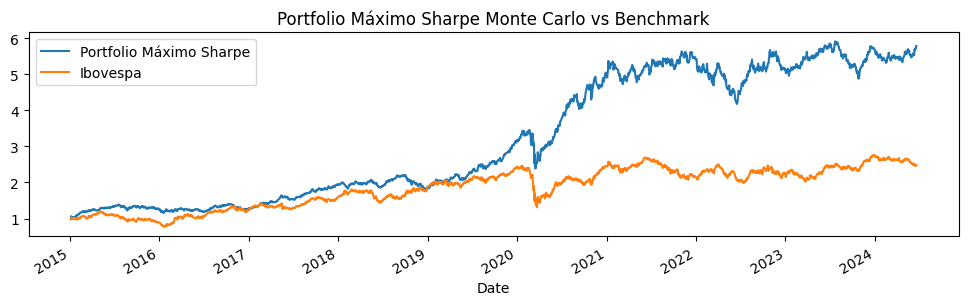

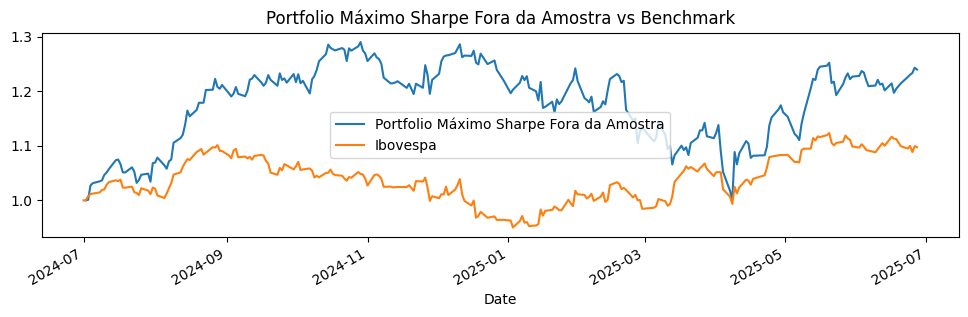

In [ ]:
#Comparação da melhor ponderação com o benchmark
plt.figure(figsize=(15,3))
dataframe_comparativo = pd.DataFrame()
dataframe_comparativo['Portfolio Máximo Sharpe'] = (1+matriz_retornos.dot(pesos_maximo_sharpe)).cumprod()
dataframe_comparativo['Ibovespa'] = yf.download('^BVSP', start='2015-01-01', end='2024-06-30')['Close'] / yf.download('^BVSP', start='2015-01-01', end='2024-06-30')['Close'].iloc[0]
dataframe_comparativo_out=pd.DataFrame()
dataframe_comparativo_out['Portfolio Máximo Sharpe Fora da Amostra'] = (1+(yf.download(ativos, start='2024-07-01', end='2025-06-30')['Close'].pct_change()).dot(matriz_pesos)).cumprod()
dataframe_comparativo_out['Ibovespa'] = yf.download('^BVSP', start='2024-07-01', end='2025-06-30')['Close'] / yf.download('^BVSP', start='2024-07-01', end='2025-06-30')['Close'].iloc[0]
dataframe_comparativo.plot(figsize=(12,3), title="Portfolio Máximo Sharpe Monte Carlo vs Benchmark")
dataframe_comparativo_out.plot(figsize=(11.83,3), title="Portfolio Máximo Sharpe Fora da Amostra vs Benchmark")s